In [1]:
import awkward as ak
import numpy as np
import pickle
import hist
import coffea
from python.plugins import *
%matplotlib inline

# from hist import intervals
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib as mpl
plt.style.use([hep.style.CMS, hep.style.firamath])

#### test voms connections
# redirector = 'root://xcache/'
redirector='root://cmsxrootd.fnal.gov/'
# files = handleData('fileset_QCD.json', redirector, year = 2018, testing = True)
files = handleData('datasets_UL_NANOAOD.json', redirector, year = 2018, testing = True)
#events = NanoEventsFactory.from_root(redirector+'/store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/6BEB9A7B-150C-7440-96D8-17A3D87F3225.root', schemaclass=NanoAODSchema).events()

import uproot
# ### uproot notation
qcd_mc = uproot.open(list(files.values())[-1][0])
# qcd_mc = uproot.open(redirector+'/store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/6BEB9A7B-150C-7440-96D8-17A3D87F3225.root')
uprootevents = qcd_mc['Events']
print(uprootevents.keys('*Q*'))
print(uprootevents['L1PreFiringWeight_Nom'].array())
print(uprootevents['L1PreFiringWeight_Up'].array())
print(uprootevents['L1PreFiringWeight_Dn'].array())
print(uprootevents['Generator_xpdf2'].array())
#### print Q2 scale
print(uprootevents['Generator_scalePDF'].array())


['FatJet_deepTagMD_H4qvsQCD', 'FatJet_deepTagMD_HbbvsQCD', 'FatJet_deepTagMD_TvsQCD', 'FatJet_deepTagMD_WvsQCD', 'FatJet_deepTagMD_ZHbbvsQCD', 'FatJet_deepTagMD_ZHccvsQCD', 'FatJet_deepTagMD_ZbbvsQCD', 'FatJet_deepTagMD_ZvsQCD', 'FatJet_deepTag_QCD', 'FatJet_deepTag_QCDothers', 'FatJet_deepTag_TvsQCD', 'FatJet_deepTag_WvsQCD', 'FatJet_deepTag_ZvsQCD', 'FatJet_particleNetMD_QCD', 'FatJet_particleNet_H4qvsQCD', 'FatJet_particleNet_HbbvsQCD', 'FatJet_particleNet_HccvsQCD', 'FatJet_particleNet_QCD', 'FatJet_particleNet_TvsQCD', 'FatJet_particleNet_WvsQCD', 'FatJet_particleNet_ZvsQCD', 'Jet_btagDeepFlavQG', 'L1_DoubleJet_80_30_Mass_Min420_DoubleMu0_SQ', 'L1_DoubleMu0_OQ', 'L1_DoubleMu0_SQ', 'L1_DoubleMu0_SQ_OS', 'L1_DoubleMu0er1p4_SQ_OS_dR_Max1p4', 'L1_DoubleMu0er1p5_SQ', 'L1_DoubleMu0er1p5_SQ_OS', 'L1_DoubleMu0er1p5_SQ_OS_dR_Max1p4', 'L1_DoubleMu0er1p5_SQ_dR_Max1p4', 'L1_DoubleMu0er2p0_SQ_OS_dR_Max1p4', 'L1_DoubleMu0er2p0_SQ_dR_Max1p4', 'L1_DoubleMu10_SQ', 'L1_DoubleMu3_SQ_ETMHF50_HTT60er'

In [2]:
# fname = "coffeaOutput/dijetHists_JetHT_pt200.0_rapidity2.5jesjecALL.pkl"
# with open(fname, "rb") as f:
#     result_data = pickle.load( f )
# fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5jesjecALL.pkl"
# with open(fname, "rb") as f:
#     result_mc = pickle.load( f )
fname = "coffeaOutput/dijetHists_JetHT_pt200.0_rapidity2.5nom2018.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
fname = "coffeaOutput/dijetHistsTest_wXSscaling_QCDsim_pt200.0_rapidity2.5_allUnc2018.pkl"
#fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5jesjecL1PU2016.pkl"
with open(fname, "rb") as f:
    result_mc = pickle.load( f )
fname = "coffeaOutput/dijetHists_ALL_QCDsim_30.0_2.5_NewHist.pkl"
with open(fname, "rb") as f:
    result_mc_old = pickle.load( f )[0]
os_path = 'plots/comparison/dijet/'
print(result_data['cutflow'])
print(result_mc_old.keys())
print(result_mc.keys())
checkdir(os_path)

defaultdict_accumulator(<class 'int'>, {'nEvents initial': 249739843, 'nEvents2018/JetHT/Run2018A-UL2018_MiniAODv2_NanoAODv9-v2/NANOAOD': 171484635, 'nEvents after trigger sel nominal': 249735257, 'nEvents after reco kine selection nominal': 3001248, 'nEvents after reco pT assym. and eta selection nominal': 2879402, 'nEvents final selection nominal': 2879402, 'chunks': 2498, 'nEvents2018/JetHT/Run2018B-UL2018_MiniAODv2_NanoAODv9-v1/NANOAOD': 78255208})
dict_keys(['jet_mass', 'jet_pt', 'jet_eta', 'njet_gen', 'jet_mass_u_reco_over_gen', 'jet_pt_gen', 'jet_mass_gen', 'jet_pt_reco_over_gen', 'jet_dphi_gen', 'jet_ptasymm_gen', 'jet_dr_gen_subjet', 'dijet_dr_reco_to_gen', 'dr_reco_to_gen_subjet', 'misses', 'fakes', 'jet_pt_mass_reco_u', 'jet_pt_mass_reco_g', 'jet_pt_mass_u_gen', 'jet_pt_mass_g_gen', 'jet_m_pt_u_reco_over_gen', 'jet_m_pt_g_reco_over_gen', 'response_matrix_u', 'response_matrix_g', 'cutflow'])
dict_keys(['jet_mass', 'jet_pt', 'jet_rap', 'jet_eta', 'njet_reco', 'njet_gen', 'jet_

In [3]:
# hep.histplot(result_mc['njet_gen'][{'syst':'nominal'}], stack=False, histtype='errorbar',
#                          density=False, marker =["o"], color = 'blue',
#                          label=['Dijet nJet'], flow='sum')
# plt.savefig(os_path+"/nJetGENDijet2016.png")

['syst', 'ptreco', 'mreco']
[200.0, 280.0, 360.0, 450.0, 520.0, 630.0, 690.0, 750.0, 800.0, 1300.0]
10
[0.0, 0.5, 1.0, 3.0, 5.0, 7.5, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 125.0, 150.0, 175.0, 200.0, 225.0, 250.0, 625.0]


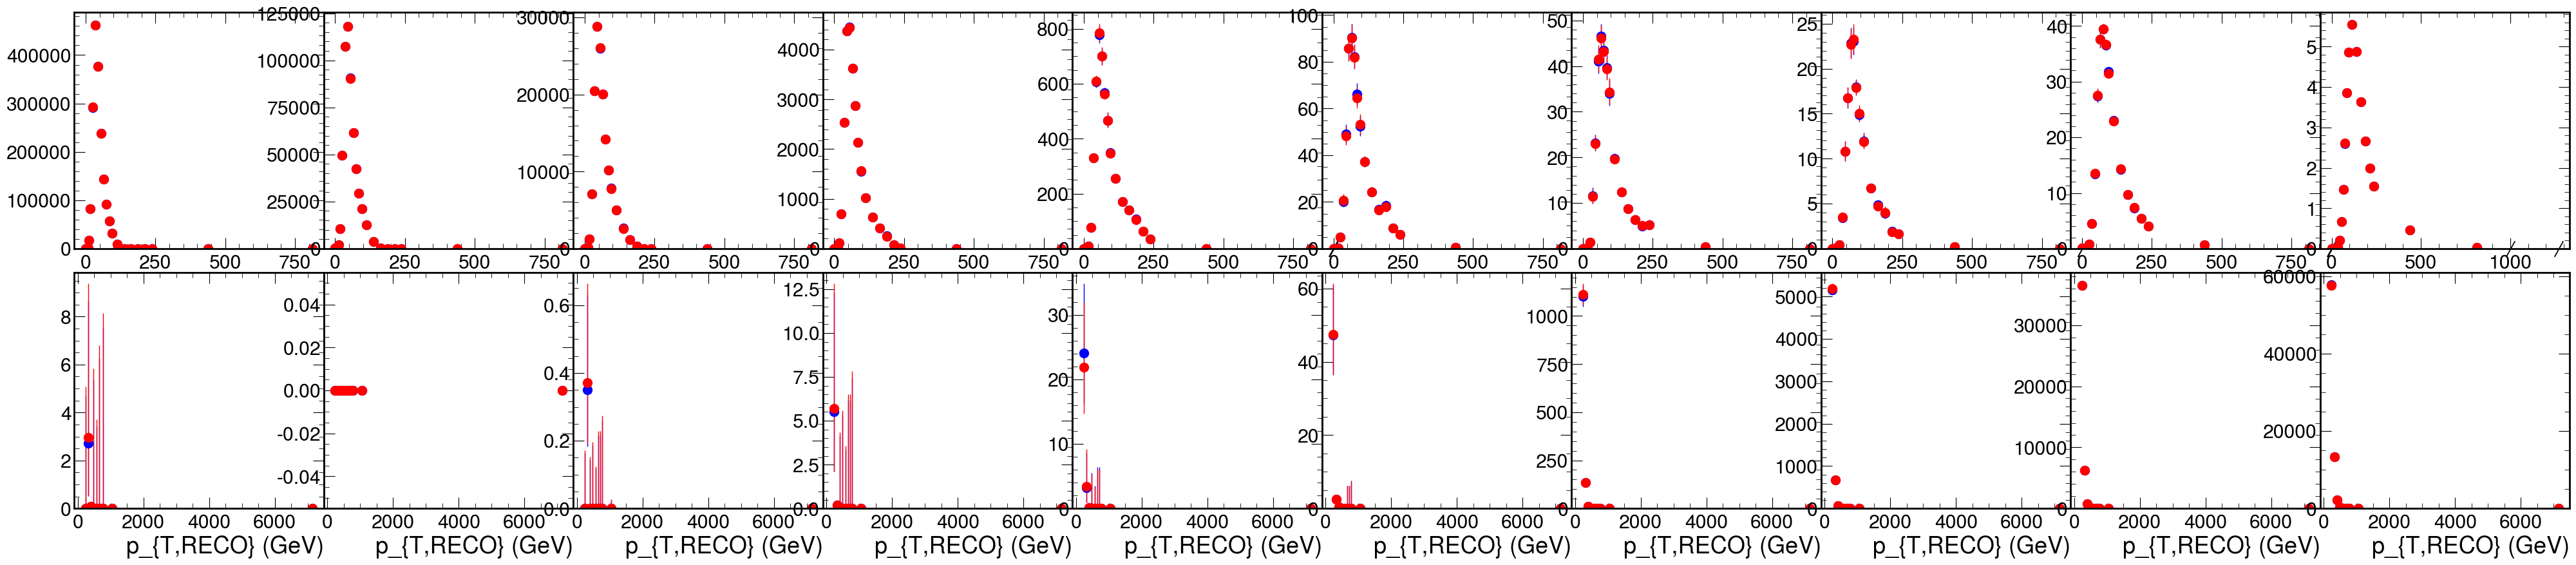

In [4]:
pt_bins = [bin[0] for bin in result_mc['jet_pt_mass_reco_u'].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result_mc['jet_pt_mass_reco_u'].project('mreco').axes[0]]
lastbin = result_mc['jet_pt_mass_reco_u'].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc['jet_pt_mass_reco_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc['jet_pt_mass_reco_u'][{'ptreco':i,'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'ptreco':i, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['jet_pt_mass_reco_u'][{'mreco':i,'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mreco':i, 'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,1000])
    # ax.set_ylim([0,4E7])
    # axm.set_xlim([0,1000])
    # axm.set_ylim([0,2E6])
plt.subplots_adjust(wspace=0.0, hspace=0.10)
plt.savefig(os_path+"/unrolledPtRecoMReco_u_2016.png")

['syst', 'ptreco', 'mreco']
[200.0, 280.0, 360.0, 450.0, 520.0, 630.0, 690.0, 750.0, 800.0, 1300.0]
10
[0.0, 0.5, 1.0, 3.0, 5.0, 7.5, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 125.0, 150.0, 175.0, 200.0, 225.0, 250.0, 625.0]


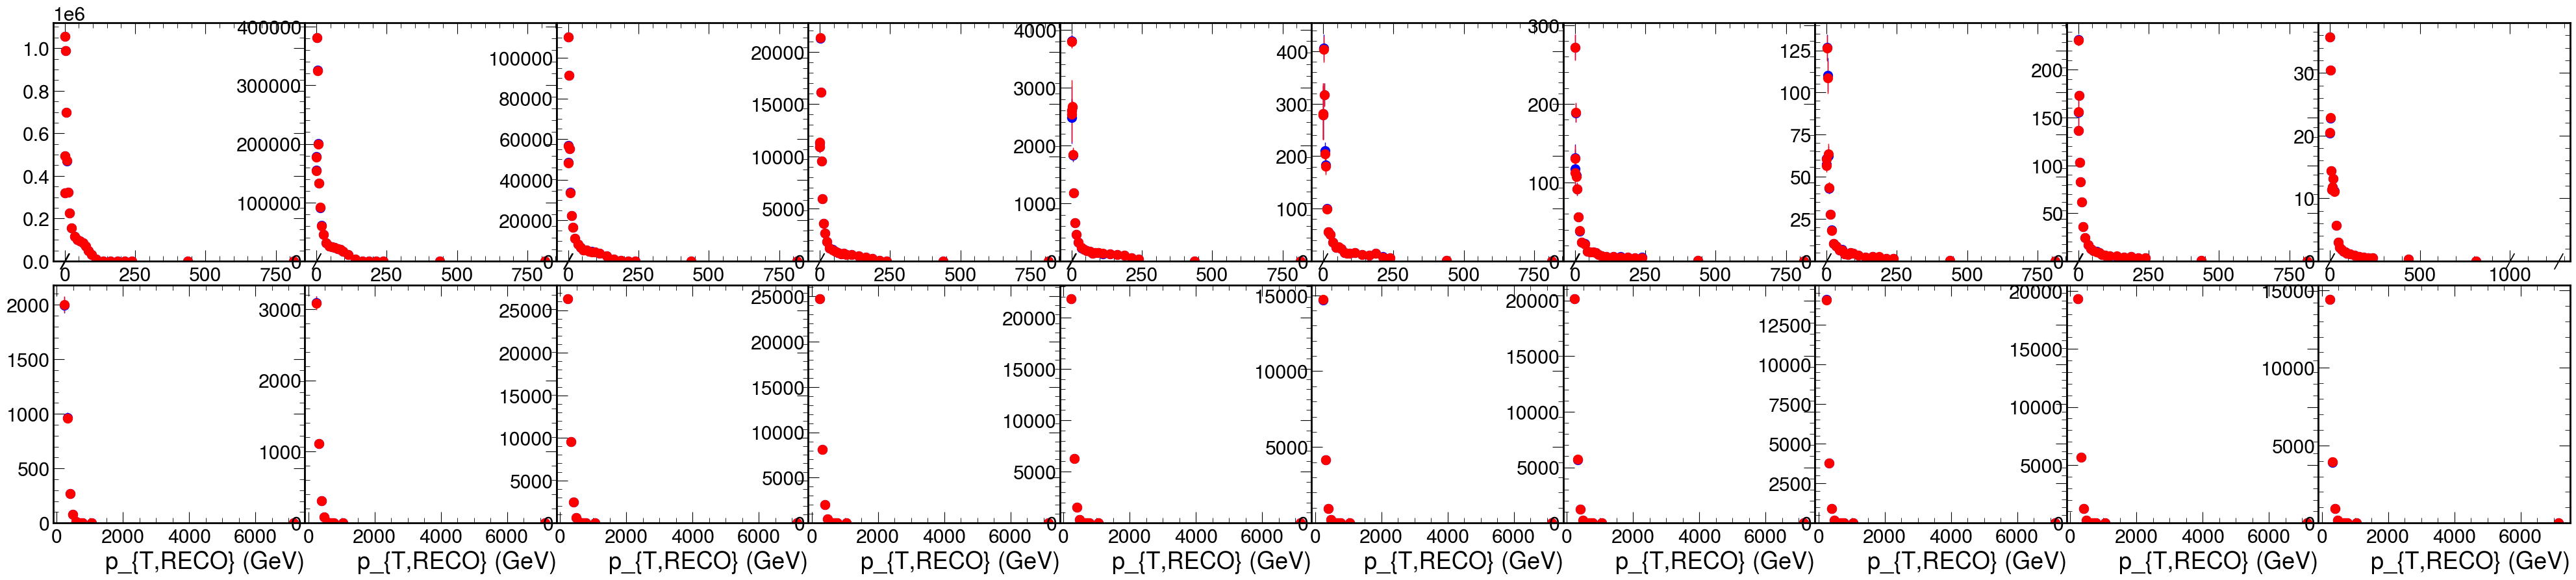

In [5]:
pt_bins = [bin[0] for bin in result_mc['jet_pt_mass_reco_u'].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result_mc['jet_pt_mass_reco_u'].project('mreco').axes[0]]
lastbin = result_mc['jet_pt_mass_reco_u'].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc['jet_pt_mass_reco_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc['jet_pt_mass_reco_g'][{'ptreco':i,'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'ptreco':i, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['jet_pt_mass_reco_g'][{'mreco':i,'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'mreco':i, 'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,1000])
    # ax.set_ylim([0,4E7])
    # axm.set_xlim([0,1000])
    # axm.set_ylim([0,2E6])
plt.subplots_adjust(wspace=0.0, hspace=0.10)
plt.savefig(os_path+"/unrolledPtRecoMReco_g_2016.png")

Hist(
  StrCategory(['nominal', 'L1prefiringDown', 'PUSFDown', 'PUSFUp', 'L1prefiringUp', 'jerUp', 'jerDown'], growth=True, name='syst', label='Systematic'),
  Variable([200, 280, 360, 450, 520, 630, 690, 750, 800, 1300, 13000], name='ptreco', label='p_{T,RECO} (GeV)'),
  Variable(array([0.00e+00, 5.00e-01, 1.00e+00, 3.00e+00, 5.00e+00, 7.50e+00,
       1.00e+01, 1.50e+01, 2.00e+01, 3.00e+01, 4.00e+01, 5.00e+01,
       6.00e+01, 7.00e+01, 8.00e+01, 9.00e+01, 1.00e+02, 1.25e+02,
       1.50e+02, 1.75e+02, 2.00e+02, 2.25e+02, 2.50e+02, 6.25e+02,
       1.00e+03]), name='mreco', label='m_{RECO} (GeV)'),
  Variable([200, 280, 360, 450, 520, 630, 690, 750, 800, 1300, 13000], name='ptgen', label='p_{T,GEN} (GeV)'),
  Variable([0, 1, 5, 10, 20, 40, 60, 80, 100, 150, 200, 250, 1000], name='mgen', label='m_{GEN} (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=1.57117e+08, variance=2.8288e+10) (WeightedSum(value=1.76948e+08, variance=3.25525e+10) with flow)
['syst', 'ptgen', 'mgen']
[200.0

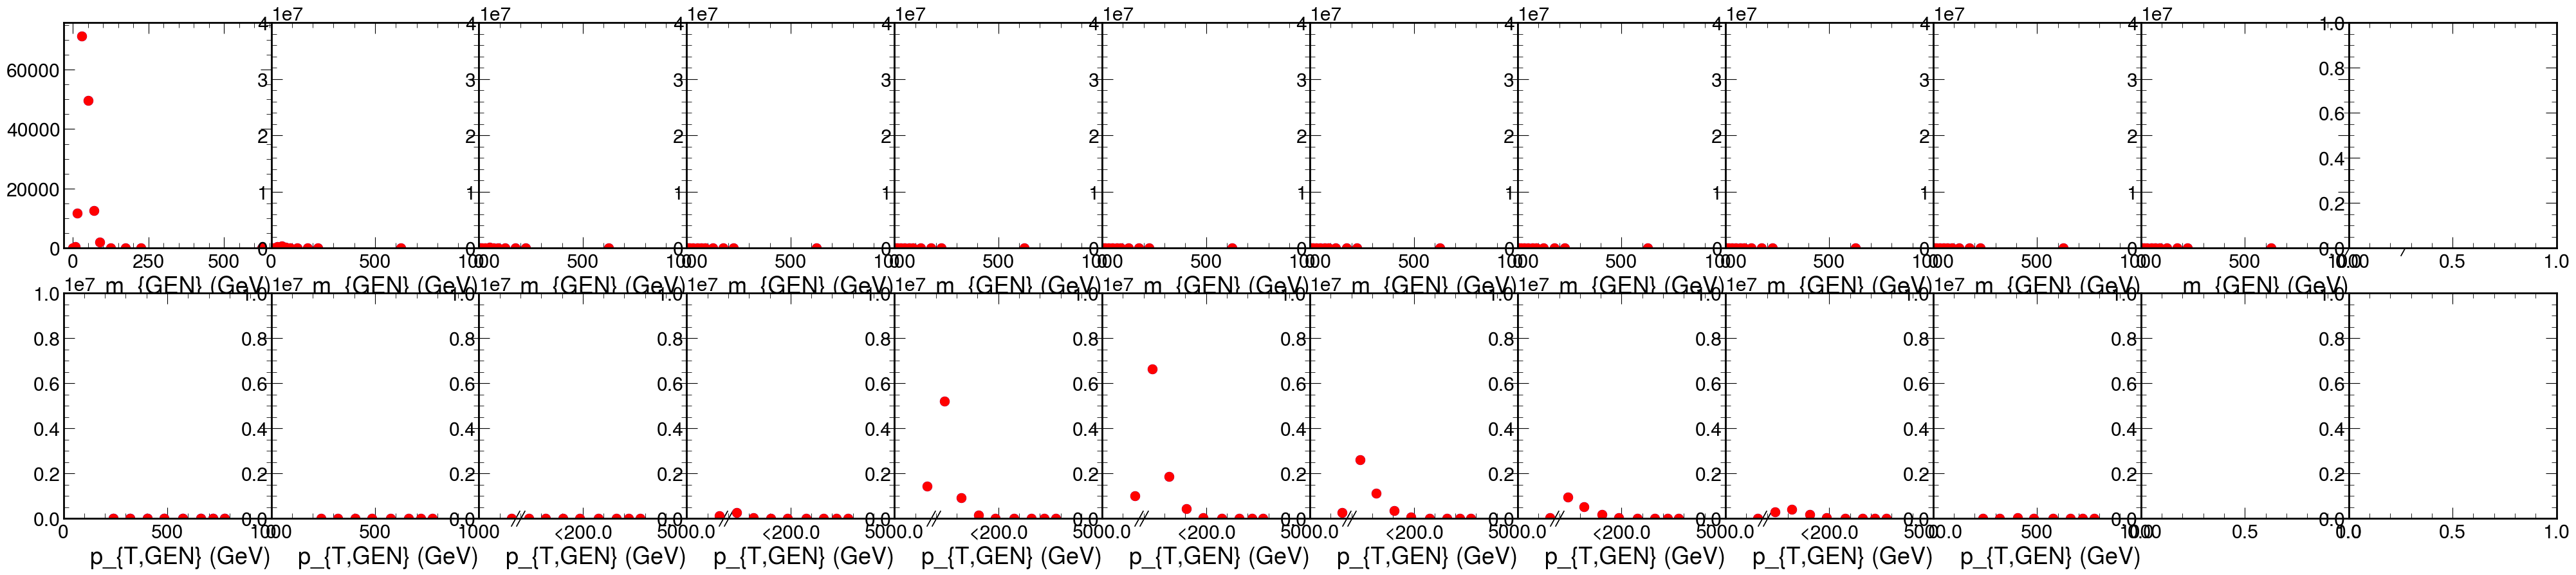

In [6]:
print(result_mc['response_matrix_u'])
pt_bins = [bin[0] for bin in result_mc['jet_pt_mass_gen_u'].project('ptgen').axes[0]]
m_bins = [bin[0] for bin in result_mc['jet_pt_mass_gen_u'].project('mgen').axes[0]]
lastbin = result_mc['jet_pt_mass_gen_u'].project('ptgen').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc['jet_pt_mass_gen_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)+2))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i+1]
    axm = axs.flatten()[i+2+len(pt_bins)]
    hep.histplot(result_mc['jet_pt_mass_gen_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue',binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red',binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['jet_pt_mass_gen_u'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue',flow='show',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', flow='show',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    ax.set_xlim([0,1000])
    ax.set_ylim([0,4E7])
    axm.set_xlim([0,1000])
    axm.set_ylim([0,1E7])
plt.subplots_adjust(wspace=0.0, hspace=0.20)
hep.histplot(result_mc['jet_pt_mass_gen_u'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['response_matrix_u'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['jet_pt_mass_gen_u'][{'mgen':hist.underflow, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['response_matrix_u'][{'mgen':hist.underflow, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
# axs[0,0].set_xlim([0,1000])
# axs[0,0].set_ylim([0,4E7])
# print(result_mc['response_matrix_u'][hist.underflow])
plt.savefig(os_path+"/unrolledPtGenMGen_u_2016.png")

Hist(
  StrCategory(['nominal', 'L1prefiringDown', 'PUSFDown', 'PUSFUp', 'L1prefiringUp', 'jerUp', 'jerDown'], growth=True, name='syst', label='Systematic'),
  Variable([200, 280, 360, 450, 520, 630, 690, 750, 800, 1300, 13000], name='ptreco', label='p_{T,RECO} (GeV)'),
  Variable(array([0.00e+00, 5.00e-01, 1.00e+00, 3.00e+00, 5.00e+00, 7.50e+00,
       1.00e+01, 1.50e+01, 2.00e+01, 3.00e+01, 4.00e+01, 5.00e+01,
       6.00e+01, 7.00e+01, 8.00e+01, 9.00e+01, 1.00e+02, 1.25e+02,
       1.50e+02, 1.75e+02, 2.00e+02, 2.25e+02, 2.50e+02, 6.25e+02,
       1.00e+03]), name='mreco', label='m_{RECO} (GeV)'),
  Variable([200, 280, 360, 450, 520, 630, 690, 750, 800, 1300, 13000], name='ptgen', label='p_{T,GEN} (GeV)'),
  Variable([0, 1, 5, 10, 20, 40, 60, 80, 100, 150, 200, 250, 1000], name='mgen', label='m_{GEN} (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=1.57117e+08, variance=2.8288e+10) (WeightedSum(value=1.76948e+08, variance=3.25525e+10) with flow)
['syst', 'ptgen', 'mgen']
[200.0

ValueError: The axis name dataset could not be found

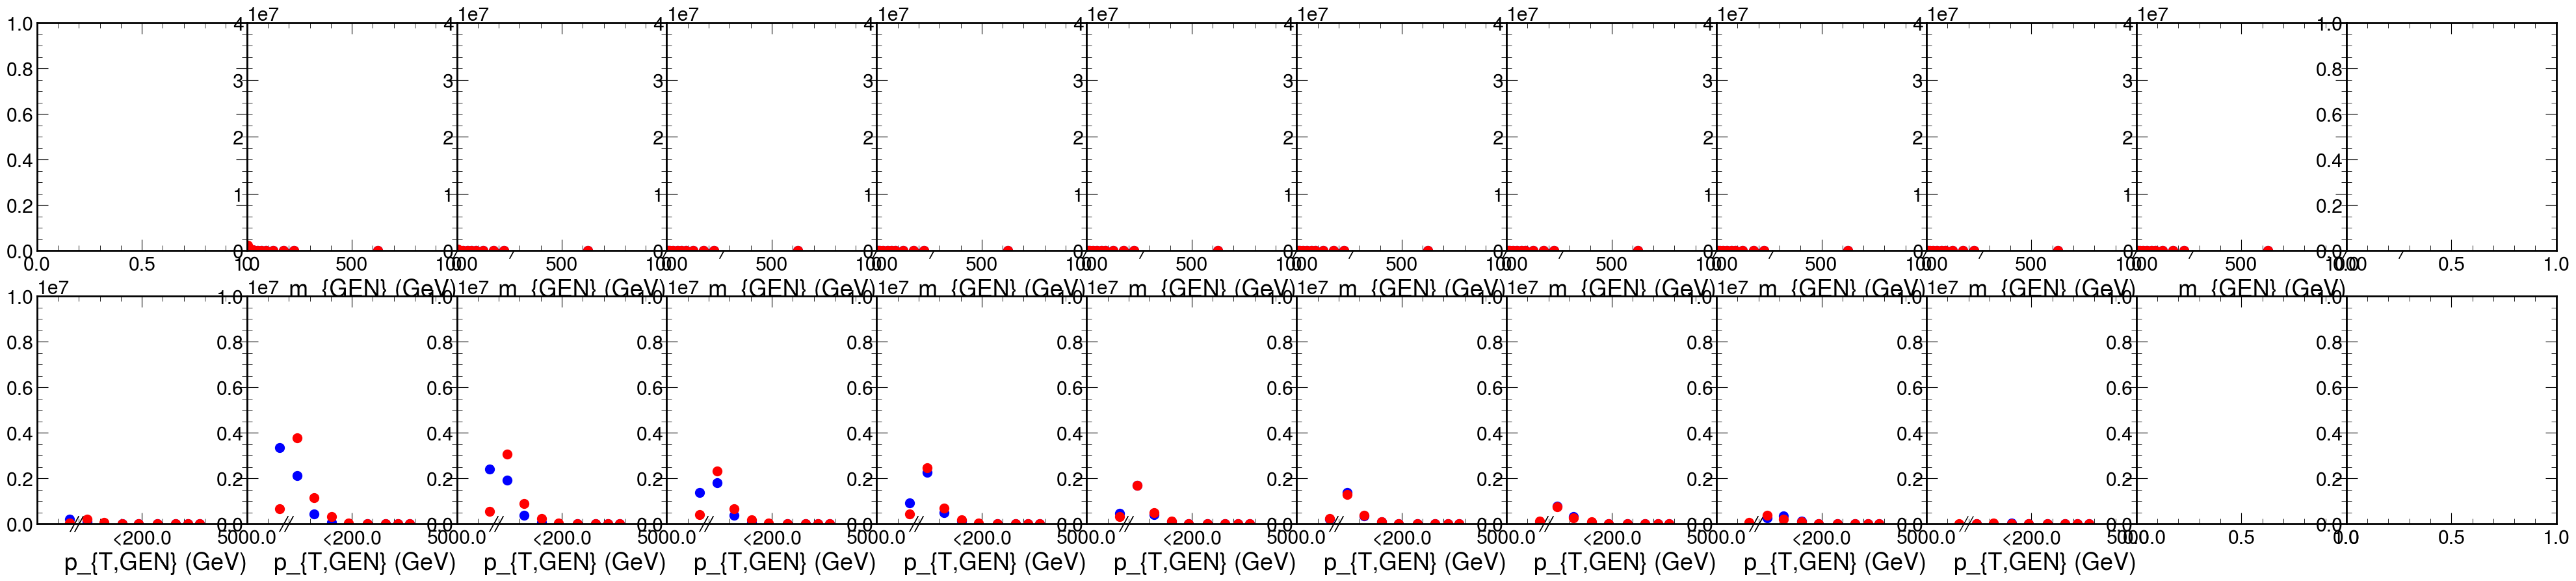

In [7]:
print(result_mc['response_matrix_u'])
pt_bins = [bin[0] for bin in result_mc['jet_pt_mass_gen_u'].project('ptgen').axes[0]]
m_bins = [bin[0] for bin in result_mc['jet_pt_mass_gen_u'].project('mgen').axes[0]]
lastbin = result_mc['jet_pt_mass_gen_u'].project('ptgen').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc['jet_pt_mass_gen_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)+2))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i+1]
    axm = axs.flatten()[i+2+len(pt_bins)]
    hep.histplot(result_mc['jet_pt_mass_gen_g'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue',binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red',binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['jet_pt_mass_gen_g'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue',flow='show',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', flow='show',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    ax.set_xlim([0,1000])
    ax.set_ylim([0,4E7])
    axm.set_xlim([0,1000])
    axm.set_ylim([0,1E7])
plt.subplots_adjust(wspace=0.0, hspace=0.20)
hep.histplot(result_mc['jet_pt_mass_gen_g'][{'ptgen':hist.underflow, 'dataset':sum, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['response_matrix_g'][{'ptgen':hist.underflow, 'dataset':sum, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['jet_pt_mass_gen_g'][{'mgen':hist.underflow, 'dataset':sum, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['response_matrix_g'][{'mgen':hist.underflow, 'dataset':sum, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
axs[0,0].set_xlim([0,1000])
axs[0,0].set_ylim([0,4E7])
# print(result_mc['response_matrix_u'][hist.underflow])
plt.savefig(os_path+"/unrolledPtGenMGen_g_2016.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
print(result_mc.keys())
axis_names = [ax.name for ax in result_mc['jet_pt_mass_reco_u'].axes]
print(axis_names)
cats = [cat for cat in result_mc['jet_pt_mass_reco_u'][{'ptreco':sum, 'dataset':sum, 'mreco':sum}].axes[0]]
pt_bins = [bin for bin in result_mc['jet_pt_mass_reco_u'].project("ptreco").axes[0]]
print(pt_bins)
fig, axs = plt.subplots(2, 2)
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
print(cats)
fig.suptitle('Dijet Data and MC w/ JER+JES corrections ungroomed (top) and groomed (bottom) reco jets')
data = [result_data['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('mreco'), 
        result_data['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('mreco'),
       result_data['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('ptreco'), 
        result_data['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('ptreco')]
mc_old = [result_mc_old['jet_pt_mass_reco_u'][{'dataset':sum,}].project('mreco'), 
        result_mc_old['jet_pt_mass_reco_g'][{'dataset':sum,}].project('mreco'),
       result_mc_old['jet_pt_mass_reco_u'][{'dataset':sum,}].project('ptreco'), 
        result_mc_old['jet_pt_mass_reco_g'][{'dataset':sum,}].project('ptreco')]
for i, ax in enumerate(axs.flatten()):
    print(ax)
    hep.histplot(data[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = 'black',
                         label=['Dijet Data'])
    hep.histplot(mc_old[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["."], color = 'teal',
                         label=['MC w/o xs scaling'])
    for j in range(len(cats)):
        syst=cats[j]
        mc = [result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':syst}].project('mreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':syst}].project('mreco'),
             result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':syst}].project('ptreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':syst}].project('ptreco')]
        hep.histplot(mc[i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"],
                             color = colors[j], linewidth=1,
                         label=['QCD sim '+syst])
    ax.set_title("Dijet Inc.")
    ax.legend()
axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[1,1].set_yscale('log')

plt.savefig(os_path+"/compareDataMC_wXSscaling_wJERJESlog.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
fig = plt.figure()
fig.suptitle('Dijet Data and MC w/ JER+JES corrections ungroomed (left) and groomed (right) reco jets')
grids = fig.add_gridspec(2,2, figure=fig, wspace=0.1, hspace=0.1)
subgrids = [grid.subgridspec(4,1, wspace=0, hspace=0) for grid in grids]
mc = [result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('mreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('mreco'),
             result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('ptreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('ptreco')]
for i, sg in enumerate(subgrids):
    num = data[i]
    denom = mc[i]
    main_ax = fig.add_subplot(sg[:-1, :])
    main_ax.set_yscale("log")
    main_ax.set_xlim([0,2200])
    subplot_ax = fig.add_subplot(sg[-1, :], sharex=main_ax)
    plt.setp(main_ax.get_xticklabels(), visible=False)
    main_ax, sublot_ax = num.plot_ratio(denom,
                                              rp_num_label="data",
                                              rp_denom_label="mc",
                                              rp_uncert_draw_type="line",
                                              ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax})

    plt.ylabel("Data/MC")
plt.savefig(os_path+"/compareDataMC_wXSscaling_wJERJES.png")

In [ ]:
fname = "coffeaOutput/trijetHists_JetHT_pt200.0_rappidity2.5_bbloosejesjecALL.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjecALL.pkl"
with open(fname, "rb") as f:
    result_mc = pickle.load( f )
fname = "coffeaOutput/trijetHists_QCDsim_pt200.0_eta2.4_bbloose.pkl"
with open(fname, "rb") as f:
    result_mc_old = pickle.load( f )[0]
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print(result_data['cutflow'])
print(result_mc['cutflow'])

In [ ]:
pt_bins = [bin[0] for bin in result_mc['jet_pt_mass_reco_u'].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result_mc['jet_pt_mass_reco_u'].project('mreco').axes[0]]
lastbin = result_mc['jet_pt_mass_reco_u'].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc['jet_pt_mass_reco_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc['jet_pt_mass_reco_u'][{'ptreco':i, 'dataset':sum, 'syst':'nominal'}], stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue',
                         label=['Trijet Mass Unrolled' + str(m_bins[i])], flow='sum')
    hep.histplot(result_mc['jet_pt_mass_reco_u'][{'mreco':i, 'dataset':sum, 'syst':'nominal'}], stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue',
                         label=['Trijet Mass Unrolled' + str(m_bins[i])])
    ax.set_xlim([0,1000])
    ax.set_ylim([0,10000])
    axm.set_xlim([0,2000])
    axm.set_ylim([0,10000])
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig(os_path+"/unrolledPtRecoMReco.png")

In [ ]:
pt_bins = [bin[0] for bin in result_mc['jet_pt_mass_reco_u'].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result_mc['jet_pt_mass_reco_u'].project('mreco').axes[0]]
lastbin = result_mc['jet_pt_mass_reco_u'].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc['jet_pt_mass_reco_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc['jet_pt_mass_reco_u'][{'ptreco':i, 'dataset':sum, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'ptreco':i, 'dataset':sum, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    ax.set_xlim([0,2000])
    ax.set_ylim([0,10000])
    axm.set_xlim([0,2000])
    axm.set_ylim([0,10000])
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig(os_path+"/unrolledPtRecoMReco.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
print(result_mc.keys())
axis_names = [ax.name for ax in result_mc['jet_pt_mass_reco_u'].axes]
print(axis_names)
cats = [cat for cat in result_mc['jet_pt_mass_reco_u'][{'ptreco':sum, 'dataset':sum, 'mreco':sum}].axes[0]]
pt_bins = [bin for bin in result_mc['jet_pt_mass_reco_u'].project("ptreco").axes[0]]
print(pt_bins)
fig, axs = plt.subplots(2, 2)
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
print(cats)
fig.suptitle('Trijet Data and MC w/ JER+JES corrections ungroomed (top) and groomed (bottom) reco jets')
# mc = [result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco')]
data = [result_data['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('mreco'), 
        result_data['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('mreco'),
       result_data['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('ptreco'), 
        result_data['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('ptreco')]
mc_old = [result_mc_old['jet_pt_mass_reco_u'][{'dataset':sum,}].project('mreco'), 
        result_mc_old['jet_pt_mass_reco_g'][{'dataset':sum,}].project('mreco'),
       result_mc_old['jet_pt_mass_reco_u'][{'dataset':sum,}].project('ptreco'), 
        result_mc_old['jet_pt_mass_reco_g'][{'dataset':sum,}].project('ptreco')]
for i, ax in enumerate(axs.flatten()):
    hep.histplot(data[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = 'black',
                         label=['Trijet Data'])
    hep.histplot(mc_old[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["."], color = 'teal',
                         label=['MC w/o xs scaling'])
    for j in range(len(cats)):
        syst=cats[j]
        mc = [result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':syst}].project('mreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':syst}].project('mreco'),
             result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':syst}].project('ptreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':syst}].project('ptreco')]
        hep.histplot(mc[i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"],
                             color = colors[j], linewidth=1,
                         label=['QCD sim '+syst])
    ax.legend()
axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[1,1].set_yscale('log')
plt.savefig(os_path+"/compareDataMC_wXSscaling_wJERJESlog.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
fig = plt.figure()
fig.suptitle('Trijet Data and MC w/ JER+JES corrections ungroomed (left) and groomed (right) reco jets')
grids = fig.add_gridspec(2,2, figure=fig, wspace=0.1, hspace=0.1)
subgrids = [grid.subgridspec(4,1, wspace=0, hspace=0) for grid in grids]
mc = [result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('mreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('mreco'),
             result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('ptreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('ptreco')]
for i, sg in enumerate(subgrids):
    num = data[i]
    denom = mc[i]
    main_ax = fig.add_subplot(sg[:-1, :])
    # main_ax.set_yscale("log")
    subplot_ax = fig.add_subplot(sg[-1, :], sharex=main_ax)
    plt.setp(main_ax.get_xticklabels(), visible=False)
    main_ax, sublot_ax = num.plot_ratio(denom,
                                              rp_num_label="data",
                                              rp_denom_label="mc",
                                              rp_uncert_draw_type="line",
                                              ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax})
    plt.ylabel("Data/MC")
plt.savefig(os_path+"/compareDataMC_wXSscaling_wJERJES.png")

In [ ]:
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0_eta2.4_bbloose.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjecALL.pkl"
with open(fname, "rb") as f:
    result_jec = pickle.load( f )
os_path = 'plots/comparison/dijet/'
checkdir(os_path)

In [ ]:
plt.rcParams["figure.figsize"] = (40,30)
print(result_jec.keys())
axis_names = [ax.name for ax in result_jec['jet_pt_mass_reco_u'].axes]
print(axis_names)
cats = [cat for cat in result_jec['jet_pt_mass_reco_u'][{'ptreco':sum, 'dataset':sum, 'mreco':sum}].axes[0]]
pt_bins = [bin for bin in result_jec['jet_pt_mass_reco_u'].project("ptreco").axes[0]]
print(pt_bins)
fig, axs = plt.subplots(4, 3)
print(len(axs[0]))
colors = ['k', 'b', 'g', 'r', 'orange']
print(cats)
fig.suptitle('MC w/ JEC+JER (top) and groomed (bottom) reco jets')
# mc = [result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco')]
for j, ax in enumerate(axs):
    mc = [result['response_matrix_u'][{'dataset':sum, 'ptgen':j}].project('mgen'), 
      result['response_matrix_u'][{'dataset':sum, 'ptreco':j}].project('mreco'), 
      result['response_matrix_g'][{'dataset':sum, 'ptgen':j}].project('mgen'), 
      result['response_matrix_g'][{'dataset':sum, 'ptreco':j}].project('mreco')]
    for i in range(len(axs[0])):
        hep.histplot(mc[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=axs[j,i], density=False, marker =["."], color = 'black', linewidth=1,
                         label=['QCD sim uncorrected]'])
        for id, syst in enumerate(cats):
            mc_jec = [result_jec['response_matrix_u'][{'dataset':sum, 'syst':syst, 'ptgen':j}].project('mgen'), 
                      result_jec['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':syst, 'ptreco':j}].project('mreco'), 
                      result_jec['response_matrix_g'][{'dataset':sum, 'syst':syst, 'ptgen':j}].project('mgen'), 
                      result_jec['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':syst, 'ptreco':j}].project('mreco')]
            hep.histplot(mc_jec[i], stack=True, histtype='step', binwnorm=1,
                             ax=axs[j,i], density=False, linestyle =["-"],
                             color = colors[id], linewidth=1,
                             label=['QCD sim '+syst])
    plt.rc('legend',fontsize='small')
    plt.legend()

for ax in axs.flatten():
    ax.set_yscale('log')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(os_path+"/jesjecComparison_MC.png")

In [ ]:
import matplotlib.pyplot as plt
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bloosejesjec2016.pkl"
with open(fname, "rb") as f:
    result_bloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjec2016.pkl"
with open(fname, "rb") as f:
    result_bbloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbmedjesjec2016.pkl"
with open(fname, "rb") as f:
    result_bbmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bmedjesjec2016.pkl"
with open(fname, "rb") as f:
    result_bmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2016.pkl"
with open(fname, "rb") as f:
    result_nobtag = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("Gluon purity bbloose ", result_bbloose['cutflow']['nGluonJets']/result_bbloose['cutflow']['n3Jets'])
print("Gluon purity bloose ", result_bloose['cutflow']['nGluonJets']/result_bloose['cutflow']['n3Jets'])
print("Gluon purity bbmed ", result_bbmed['cutflow']['nGluonJets']/result_bbmed['cutflow']['n3Jets'])
print("Gluon purity bmed ", result_bmed['cutflow']['nGluonJets']/result_bmed['cutflow']['n3Jets'])
print("Gluon purity no btag ", result_nobtag['cutflow']['nSoftestGluonJets']/result_nobtag['cutflow']['n3Jets'])
print(result_nobtag['cutflow'].keys())

In [ ]:
#### B TAG PLOTS OLD WAY
bloose_num = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bloose_denom = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbloose_num = [result_bbloose['jet_pt'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptgen'), 
               result_bbloose['jet_mass'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mgen'), 
               result_bbloose['jet_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbloose['btag'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbloose_denom = [result_bbloose['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
                 result_bbloose['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
                 result_bbloose['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbloose['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbmed_num = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbmed_denom = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bmed_num = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bmed_denom = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nobtag_num = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
def plotratio_cms(num, denom, ax, color, label):
    ratio = num.values() /  denom.values()
    ratio[ratio == 0] = np.nan
    ratio[np.isinf(ratio)] = np.nan
    hep.histplot(ratio, bins = num.axes.edges[0], stack=False, histtype='step',
                         ax=ax, density=False, linestyle =["-"], color = color, linewidth=1,
                         label=[label])
nums = [bloose_num, bbloose_num, bmed_num, bbmed_num, nobtag_num]
denoms = [bloose_denom, bbloose_denom, bmed_denom, bbmed_denom, nobtag_denom]
btag_names = ['bloose', 'bbloose', 'bmed', 'bbmed', 'nobtag']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2016 btag studies')
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("Softest Trijet QCD_binnned MC 2016")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagComparison2016.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2016 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("Sotest Trijet QCD_binned MC 2016")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2016.png")

In [ ]:
import matplotlib.pyplot as plt
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bloosejesjec2017.pkl"
with open(fname, "rb") as f:
    result_bloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjec2017.pkl"
with open(fname, "rb") as f:
    result_bbloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbmedjesjec2017.pkl"
with open(fname, "rb") as f:
    result_bbmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bmedjesjec2017.pkl"
with open(fname, "rb") as f:
    result_bmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2017.pkl"
with open(fname, "rb") as f:
    result_nobtag = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("Gluon purity bbloose ", result_bbloose['cutflow']['nGluonJets']/result_bbloose['cutflow']['n3Jets'])
print("Gluon purity bloose ", result_bloose['cutflow']['nGluonJets']/result_bloose['cutflow']['n3Jets'])
print("Gluon purity bbmed ", result_bbmed['cutflow']['nGluonJets']/result_bbmed['cutflow']['n3Jets'])
print("Gluon purity bmed ", result_bmed['cutflow']['nGluonJets']/result_bmed['cutflow']['n3Jets'])
print("Gluon purity nobtag ", result_nobtag['cutflow']['nSoftestGluonJets']/result_nobtag['cutflow']['n3Jets'])
print("Gluon purity all jets ", result_nobtag['cutflow']['nSoftestJets']/(result_nobtag['cutflow']['nJets']))
print(result_nobtag['cutflow'].keys())

In [ ]:
#### B TAG PLOTS OLD WAY
bloose_num = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bloose_denom = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbloose_num = [result_bbloose['jet_pt'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('ptgen'), 
               result_bbloose['jet_mass'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('mgen'), 
               result_bbloose['jet_eta'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('eta'), 
               result_bbloose['btag'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('frac') ]
bbloose_denom = [result_bbloose['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
                 result_bbloose['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
                 result_bbloose['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbloose['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbmed_num = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbmed_denom = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bmed_num = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bmed_denom = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nobtag_num = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nums = [bloose_num, bbloose_num, bmed_num, bbmed_num, nobtag_num]
denoms = [bloose_denom, bbloose_denom, bmed_denom, bbmed_denom, nobtag_denom]
btag_names = ['bloose', 'bbloose', 'bmed', 'bbmed', 'nobtag']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2017 btag studies')
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("MC 2017")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagComparison2017.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2017 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("QCD_binned MC 2017")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2017.png")

In [ ]:
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bloosejesjec2018.pkl"
with open(fname, "rb") as f:
    result_bloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjec2018.pkl"
with open(fname, "rb") as f:
    result_bbloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbmedjesjec2018.pkl"
with open(fname, "rb") as f:
    result_bbmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bmedjesjec2018.pkl"
with open(fname, "rb") as f:
    result_bmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2018.pkl"
with open(fname, "rb") as f:
    result_nobtag = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("Gluon purity bbloose ", result_bbloose['cutflow']['nGluonJets']/result_bbloose['cutflow']['n3Jets'])
print("Gluon purity bloose ", result_bloose['cutflow']['nGluonJets']/result_bloose['cutflow']['n3Jets'])
print("Gluon purity bbmed ", result_bbmed['cutflow']['nGluonJets']/result_bbmed['cutflow']['n3Jets'])
print("Gluon purity bmed ", result_bmed['cutflow']['nGluonJets']/result_bmed['cutflow']['n3Jets'])
print("Gluon purity no btag ", result_nobtag['cutflow']['nGluonJets']/result_nobtag['cutflow']['n3Jets'])
print(result_nobtag['cutflow'].keys())

In [ ]:
#### B TAG PLOTS OLD WAY
bloose_num = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bloose_denom = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbloose_num = [result_bbloose['jet_pt'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('ptgen'), 
               result_bbloose['jet_mass'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('mgen'), 
               result_bbloose['jet_eta'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('eta'), 
               result_bbloose['btag'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('frac') ]
bbloose_denom = [result_bbloose['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
                 result_bbloose['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
                 result_bbloose['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbloose['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbmed_num = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbmed_denom = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bmed_num = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bmed_denom = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nobtag_num = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nums = [bloose_num, bbloose_num, bmed_num, bbmed_num, nobtag_num]
denoms = [bloose_denom, bbloose_denom, bmed_denom, bbmed_denom, nobtag_denom]
btag_names = ['bloose', 'bbloose', 'bmed', 'bbmed', 'nobtag']
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("MC 2018")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagRatios2018.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("QCD_binned MC 2018")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2018.png")

In [ ]:
fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5jesjecL1PU2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
for key in list(result['cutflow'].keys()):
    if "nEvents" in key:
        print(key, ": ", result['cutflow'][key])
print(result['cutflow'].keys())
print("fakes: ", result['cutflow']["fakes nominal"])
print("misses: ", result['cutflow']["misses nominal"])

In [ ]:
fname = "coffeaOutput/dijetHists_JetHT_pt200.0_rapidity2.5jesjecL1PU2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
for key in list(result['cutflow'].keys()):
    if "nEvents" in key:
        print(key, ": ", result['cutflow'][key])
print(result["cutflow"].keys())

In [ ]:
fname = "coffeaOutput/trijetHists_JetHT_pt200.0_rappidity2.5_Nonejesjec2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
for key in list(result['cutflow'].keys()):
    if "nEvents" in key:
        print(key, ": ", result['cutflow'][key])
print(result["cutflow"].keys())

In [ ]:
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
print(result.keys())

In [ ]:
nobtag_num = [result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
pdgbb_num = [result['alljet_ptreco_mreco'][{'partonFlav':'Gluon_bb', 'jetNumb':'jet3'}].project('ptreco'), 
               result['alljet_ptreco_mreco'][{'partonFlav':'Gluon_bb', 'jetNumb':'jet3'}].project('mreco'), 
               result['btag_eta'][{'partonFlav':'Gluon_bb', 'jetNumb':'jet3'}].project('eta'), 
               result['btag_eta'][{'partonFlav':'Gluon_bb', 'jetNumb':'jet3'}].project('frac') ]
pdgbb_denom = [result['alljet_ptreco_mreco'][{'partonFlav':'All_bb', 'jetNumb':'jet3'}].project('ptreco'), 
                 result['alljet_ptreco_mreco'][{'partonFlav':'All_bb', 'jetNumb':'jet3'}].project('mreco'), 
                 result['btag_eta'][{'partonFlav':'All_bb', 'jetNumb':'jet3'}].project('eta'), 
                 result['btag_eta'][{'partonFlav':'All_bb', 'jetNumb':'jet3'}].project('frac') ]
pdgb_num = [result['alljet_ptreco_mreco'][{'partonFlav':'Gluon_b', 'jetNumb':'jet3'}].project('ptreco'), 
               result['alljet_ptreco_mreco'][{'partonFlav':'Gluon_b', 'jetNumb':'jet3'}].project('mreco'), 
               result['btag_eta'][{'partonFlav':'Gluon_b', 'jetNumb':'jet3'}].project('eta'), 
               result['btag_eta'][{'partonFlav':'Gluon_b', 'jetNumb':'jet3'}].project('frac') ]
pdgb_denom = [result['alljet_ptreco_mreco'][{'partonFlav':'All_b', 'jetNumb':'jet3'}].project('ptreco'), 
                 result['alljet_ptreco_mreco'][{'partonFlav':'All_b', 'jetNumb':'jet3'}].project('mreco'), 
                 result['btag_eta'][{'partonFlav':'All_b', 'jetNumb':'jet3'}].project('eta'), 
                 result['btag_eta'][{'partonFlav':'All_b', 'jetNumb':'jet3'}].project('frac') ]
nums = [pdgbb_num, pdgb_num, nobtag_num]
denoms = [pdgbb_denom, pdgb_denom, nobtag_denom]
btag_names = ['pdg bb', 'pdg b', 'nobtag']
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2016 test btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("MC 2016")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagRatios2016test.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("QCD_binned MC 2016 test")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2016test.png")

In [ ]:
axis_names = [ax.name for ax in result_mc['jet_pt_mass_reco_u'].axes]
print(axis_names)
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(3, 3)
print(result['jet_mass'])
result['jet_mass'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
axs[0,0].set_xlabel("Jet1 mass (GeV)")
result['jet_pt'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,1], overlay='partonFlav')
axs[0,1].set_xlabel("Jet1 pT (GeV)")
result['jet_eta'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,2], overlay='partonFlav')
axs[0,2].set_xlabel("Jet1 eta (GeV)")
result['jet_mass'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,0], overlay='partonFlav')
axs[1,0].set_xlabel("Jet2 mass (GeV)")
result['jet_pt'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,1], overlay='partonFlav')
axs[1,1].set_xlabel("Jet2 pT (GeV)")
result['jet_eta'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,2], overlay='partonFlav')
axs[1,2].set_xlabel("Jet2 eta (GeV)")
result['jet_mass'][{'jetNumb':'jet3', 'dataset':sum}].plot1d(ax = axs[2,0], overlay='partonFlav')
axs[2,0].set_xlabel("Jet3 mass (GeV)")
result['jet_pt'][{'jetNumb':'jet3', 'dataset':sum}].plot1d(ax = axs[2,1], overlay='partonFlav')
axs[2,1].set_xlabel("Jet3 pT (GeV)")
result['jet_eta'][{'jetNumb':'jet3', 'dataset':sum}].plot1d(ax = axs[2,2], overlay='partonFlav')
axs[2,2].set_xlabel("Jet3 eta (GeV)")
for ax in axs.flatten():
    ax.legend()
print(axs)
fig.suptitle('Dijet eta <2.5, pt> 200.', fontsize="large")
plt.savefig(os_path+'/singleJetPtEtaPhi_partons' + ".png")